In [1]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Section 1 - Data Cleaning: Missing Data & Inaccurate Data Types

In [2]:
# load data from automobile.txt & turn it into pandas dataframe
auto_df = pd.read_csv('automobile.txt', delimiter=',')
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto_df.shape

(205, 26)

The automobile dataset has 205 rows & 26 columns. Now, duplicated rows are deleted ...

In [4]:
# dropping any duplicate rows that may be present in the dataframe
auto_df.drop_duplicates(inplace=True)
auto_df.shape

(205, 26)

Following drop_duplicates, there are still 205 rows x 26 columns. This means there were no duplicated rows.

In [5]:
# using .describe() to investigate characteristics of numerical data
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
# check to null values in dataframe
auto_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

So far, we observe the following about the dataframe:
- the shape of the original dataframe is: 205 rows x 26 columns & drop_cuplicates() returned the same shape (205 x 26), meaning that there were no duplicated rows
- using.describe(), only 10 columns were shown, but in the original dataframe it's obvious that there are other numerical columns (e.g. 'bore', 'stroke', 'horsepower', or 'price'). The data types for these column are probably not accurate, and/or for some reasons the data in these columns are inconsistent so that statistics couldn't be calculated.
- .isnull().sum() shows that there were no null values across all 26 columns, but there are clearly missing data denoted as '?' in 'normalized_losses'. Perhaps the '?' notation has been used to indicate missing data throughout this dataset; this needs to be further investigated.

In [7]:
# count the occurance of '?' across the entire dataset
auto_df.isin(['?']).sum(axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There are 41 missing values denoted as '?' in 'normalized_losses' (41 out of 205 = 20% a.k.a. a lot of missing data!). We may consider dropping 'normalized_losses' column altogether later. In contrast, there are only 2-4 missing data ('?') in several other columns ('num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm','price'), so perhaps it won't be too detrimental if entries with these missing data are deleted.

In [8]:
# examining the data types
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

If we examine the data types of columns containing '?' ('normalized_losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price') (see below), they've been assigned as 'object' when they clearly contain numerical data that should've been float64 or int64.

The '?' will be replaced with 0's and then the data in these columns changed to float64 or int64 (where appropriate).

In [9]:
# replacing '?' with '0'
auto_df['normalized-losses'].replace('?','0',inplace=True)
auto_df['num-of-doors'].replace('?','0',inplace=True)
auto_df['bore'].replace('?','0',inplace=True)
auto_df['stroke'].replace('?','0',inplace=True)
auto_df['horsepower'].replace('?','0',inplace=True)
auto_df['peak-rpm'].replace('?','0',inplace=True)
auto_df['price'].replace('?','0',inplace=True)

In [10]:
# changing data types of data from relevant columns to numeric
auto_df['normalized-losses'] = auto_df['normalized-losses'].apply(pd.to_numeric, errors='coerce')
auto_df['bore'] = auto_df['bore'].apply(pd.to_numeric, errors='coerce')
auto_df['stroke'] = auto_df['stroke'].apply(pd.to_numeric, errors='coerce')
auto_df['horsepower'] = auto_df['horsepower'].apply(pd.to_numeric, errors='coerce')
auto_df['peak-rpm'] = auto_df['peak-rpm'].apply(pd.to_numeric, errors='coerce')
auto_df['price'] = auto_df['price'].apply(pd.to_numeric, errors='coerce')

In [11]:
# examining the data types again
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Now that the numeric data have been corrected, we will look at the categorical data ('make', 'fuel-type', 'aspiration', 'num-of-doors, 'body-style, 'drive-wheels', 'engine-location', engine-type', 'num-of-cylinders' & 'fuel-system').

In [12]:
auto_df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [13]:
auto_df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [14]:
auto_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [15]:
auto_df['num-of-doors'].value_counts()

four    114
two      89
0         2
Name: num-of-doors, dtype: int64

In [16]:
auto_df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [17]:
auto_df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [18]:
auto_df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [19]:
auto_df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [20]:
auto_df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [21]:
auto_df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

- By inspecting the outputs above, it's clear that the entries are not evenly distributed in terms of numbers regardless of the category.
- It seems that there are no duplicated names with typos or accidental trailing white space, so we don't need to standardise the naming system.
- It looks like data under 'num-of-doors' and 'num-of-cylinders' can be converted to numerical data.

In [22]:
# coverting data in 'num-of-doors' & 'num-of-cylinders' to numerical data

auto_df['num-of-doors'] = auto_df['num-of-doors'].map({'four': 4, 'two': 2})
auto_df['num-of-doors'].apply(pd.to_numeric, errors='coerce')

auto_df['num-of-cylinders'] = auto_df['num-of-cylinders'].map({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12})
auto_df['num-of-cylinders'].apply(pd.to_numeric, errors='coerce')

auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [23]:
auto_df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.600000,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.264780,3.191902,10.142537,103.239024,5075.365854,25.219512,30.751220,12949.429268
std,1.245307,58.282073,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.535268,0.549625,3.972040,40.832470,694.650771,6.542142,6.886443,8079.043284
min,-2.000000,0.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,0.000000,0.000000,7.000000,0.000000,0.000000,13.000000,16.000000,0.000000
25%,0.000000,77.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.130000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7689.000000
50%,1.000000,103.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10198.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


There are now 18 columns with numerical data.

Now a new copy dataframe is created for further manipulations in EDA (Section 2). First, on this copy dataframe, we'll drop 'normalized-losses' column, and delete entries (rows) in any other columns that contain 0's.

#### Justification for dropping 'normalized-losses' column
We've dropped 'normalized-losses' column because 20% of the data in this column is missing. Imputations on these missing values will result in a large proportion of the data being unreliable. Furthermore, it was found that there is a weak correlation between 'normalized-losses' and 'symboling' (see Supplementary Section later). This makes sense because both features are insurance-related features. Therefore, 'symboling' data alone was deemed sufficient to represent how risky a car is (from insurance point-of-view).

In [24]:
copy_auto_df = pd.DataFrame(auto_df.drop(['normalized-losses'], axis = 1))

In [25]:
copy_auto_df.drop(copy_auto_df[copy_auto_df['num-of-doors'] == 0].index, inplace=True)
copy_auto_df.drop(copy_auto_df[copy_auto_df['bore'] == 0].index, inplace=True)
copy_auto_df.drop(copy_auto_df[copy_auto_df['stroke'] == 0].index, inplace=True)
copy_auto_df.drop(copy_auto_df[copy_auto_df['horsepower'] == 0].index, inplace=True)
copy_auto_df.drop(copy_auto_df[copy_auto_df['peak-rpm'] == 0].index, inplace=True)
copy_auto_df.drop(copy_auto_df[copy_auto_df['price'] == 0].index, inplace=True)

In [26]:
copy_auto_df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


We now have 195 rows x 26 columns (i.e. 10 rows have been deleted). We'll use copy_auto_df datafame for the remaining part of EDA

### Section 2 -  Numeric Data Exploration

First, let's explore the numeric data. To gain insights into the relationships between the numeric data columns at a glance, a scatterplot matrix was created (see below). This scatterplot matrix is information-rich but it can be difficult to examine in detail (because it is a 17 x 17 matrix and the plots and labels are really small) (why 17? because we had 18 numeric columns and we've dropped 'normalized_losses' column). Later on, further explorations will be performed on interesting observations from this matrix.

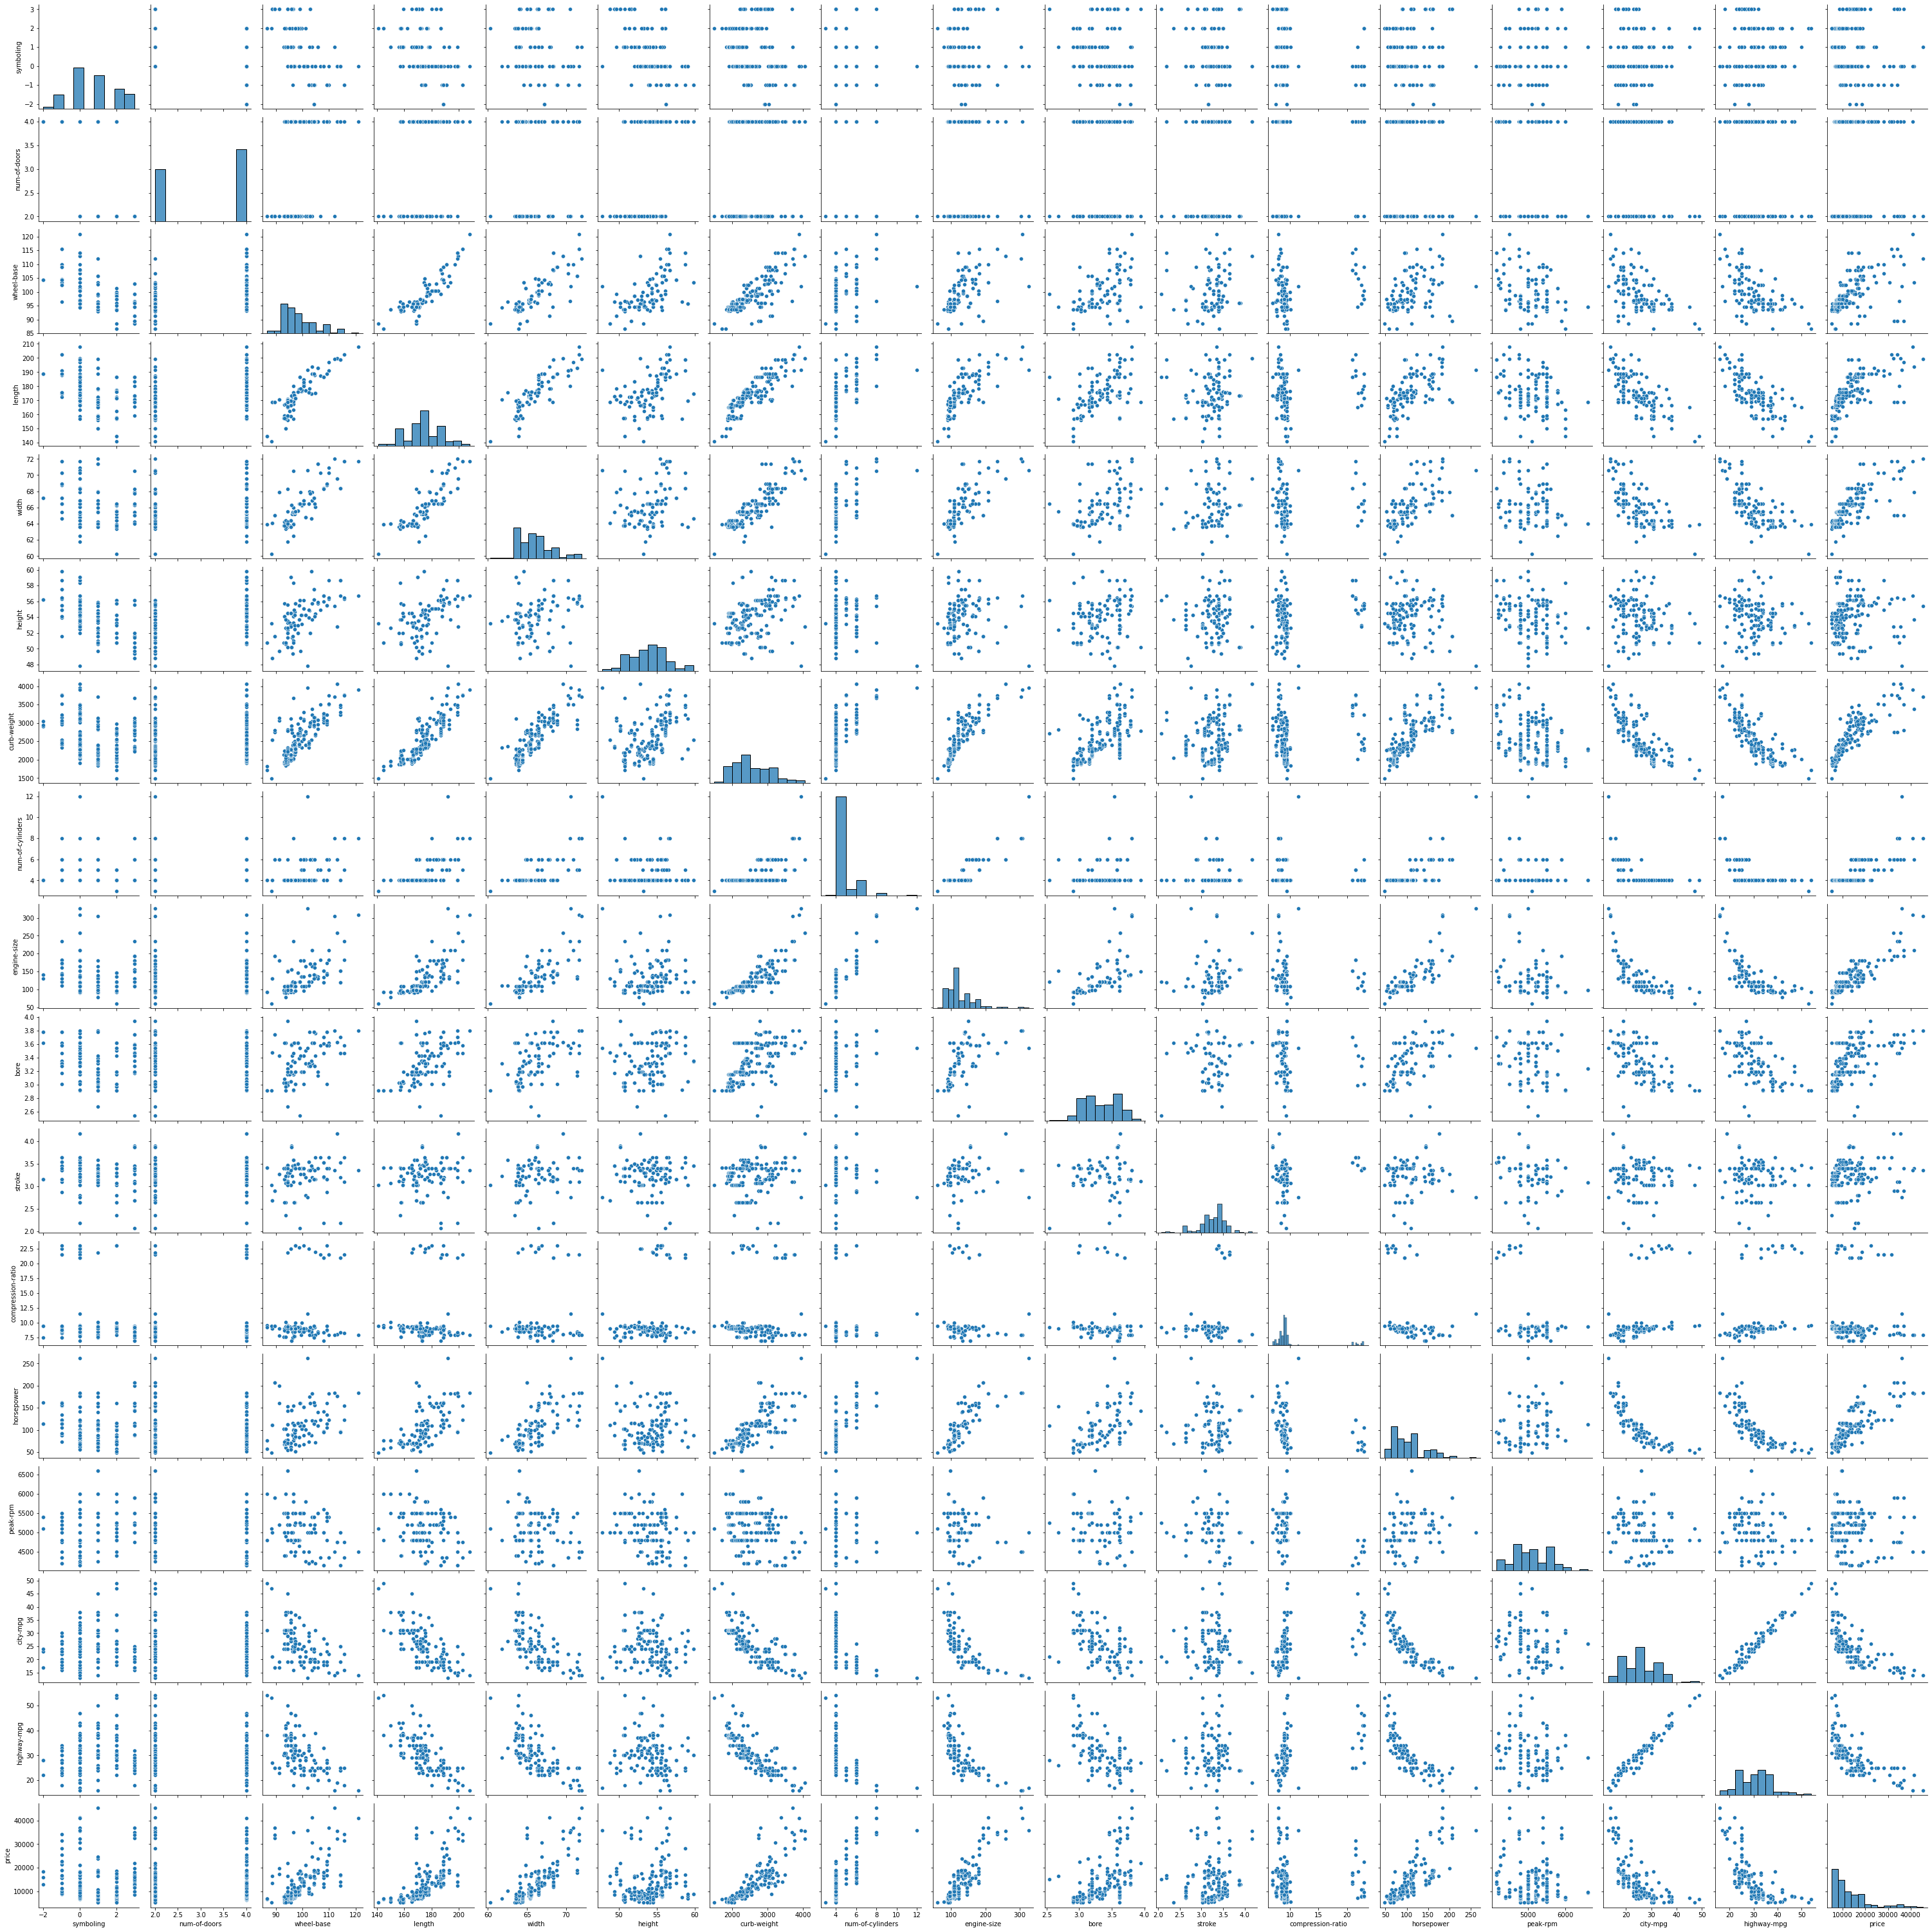

In [27]:
sns.pairplot(copy_auto_df)
plt.show()

Several features seem to correlate well either positively or negatively with a number of other features. For instance, positive correlations can be found between:
- wheel-base and length, width and curb-weight
- horsepower and engine-size, num-of-cylinders, and price
- city-mpg and highway-mpg

In contrast, neative correlations can be found between:
- symboling and num-of-doors, wheel-base
- city-mpg or highway-mpg with length, width, curb-weight, engine-size, horsepower, and price.

To further explore and quantify the possible correlations among the features, a heatmap showing the Person correlation coefficients are shown below. Again, the correlations mentioned above are replicated, with correlation coefficients of 0.7 to 0.9 (for strong positive correlations), or  -0.7 to -0.8 (for strong negative correlations). Interestingly, some features, such as stroke, compression-ratio, or peak-rpm, did not show any obvious strong correlations to any other features.

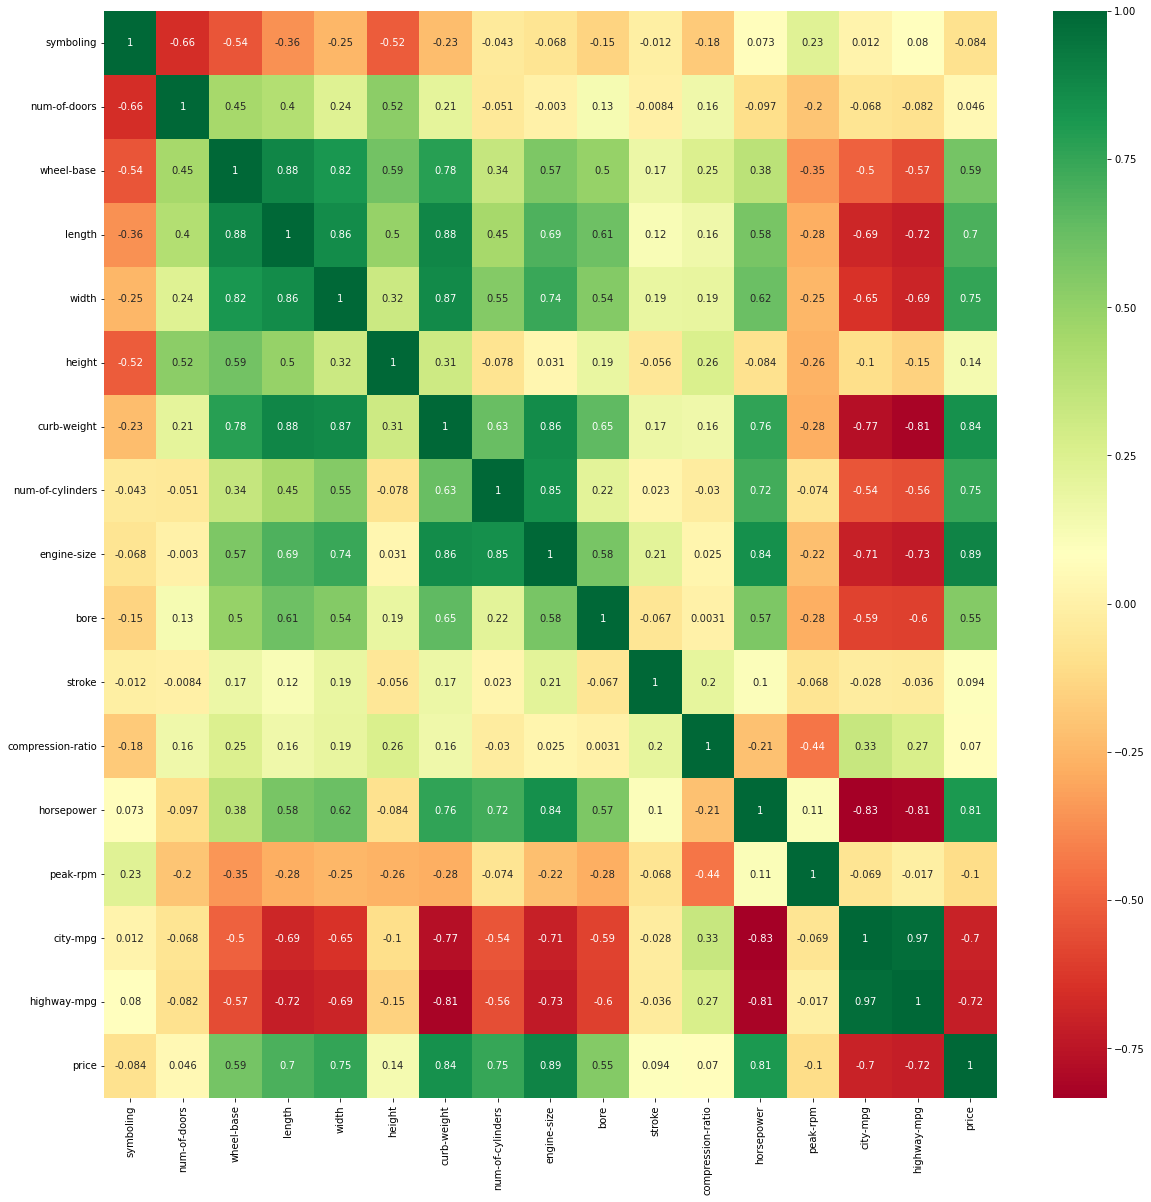

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(copy_auto_df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

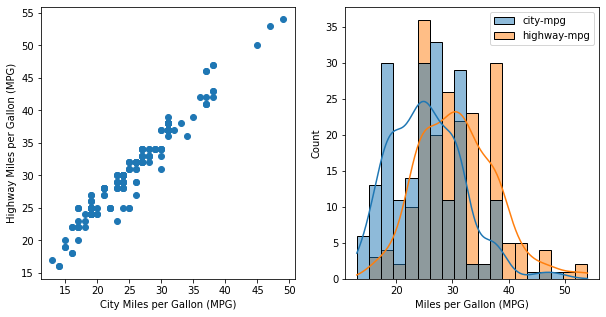

In [29]:
fig, axs = plt.subplots(1,2,figsize = (10,5))
axs[0].scatter(x=copy_auto_df['city-mpg'], y=copy_auto_df['highway-mpg'])
axs[0].set_xlabel("City Miles per Gallon (MPG)")
axs[0].set_ylabel("Highway Miles per Gallon (MPG)")
sns.histplot(data = copy_auto_df[['city-mpg', 'highway-mpg']], kde =True, ax=axs[1])
axs[1].set_xlabel("Miles per Gallon (MPG)")
plt.show()

Since city-mpg and highway-mpg are positively correlated to each other but negatively correlated to a number of other features, we'll first examine the relationships and distributions.
- On the left, the scatter plot shows a strong linear relationship between the two features. Therefore, moving forward, city-mpg can be used as a single representative proxy feature for fuel efficiency.
- On the right, histograms showing the distribution of city-mpg and highway-mpg indicate that the distribution of highway-mpg data are skewed towards the higher MPG but only slightly. This is expected since, in general, fuel efficiency is higher when driving on a highway.

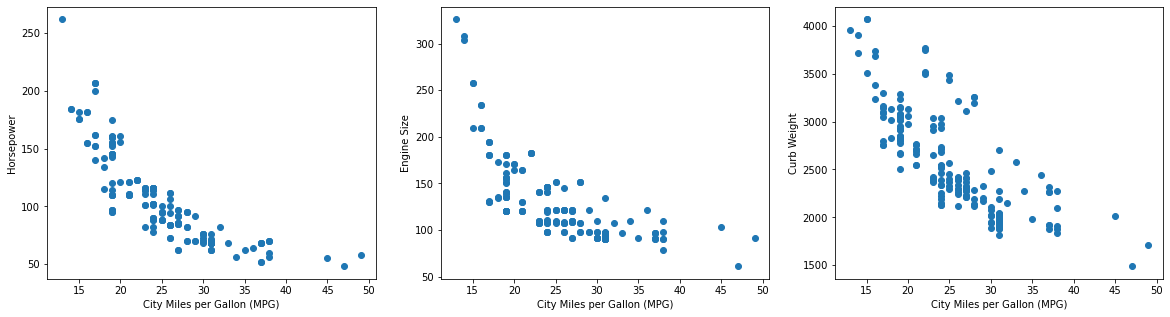

In [30]:
fig, axs = plt.subplots(1,3,figsize = (20,5))

axs[0].scatter(x=copy_auto_df['city-mpg'], y=copy_auto_df['horsepower'])
axs[0].set_xlabel("City Miles per Gallon (MPG)")
axs[0].set_ylabel("Horsepower")

axs[1].scatter(x=copy_auto_df['city-mpg'], y=copy_auto_df['engine-size'])
axs[1].set_xlabel("City Miles per Gallon (MPG)")
axs[1].set_ylabel("Engine Size")

axs[2].scatter(x=copy_auto_df['city-mpg'], y=copy_auto_df['curb-weight'])
axs[2].set_xlabel("City Miles per Gallon (MPG)")
axs[2].set_ylabel("Curb Weight")

plt.show()

As mentioned previously, city-mpg is negatively correlated to horsepower, engine-size, and curb-weight (Pearson correlation coefficients: -0.83, -0.71, and -0.77, respectively) but not in a strictly linear fashion as shown in the scatter plots above. This is expected since larger cars (with larger curb-weight) often require larger engines to produce more horsepower. The larger engines usually require more fuel.

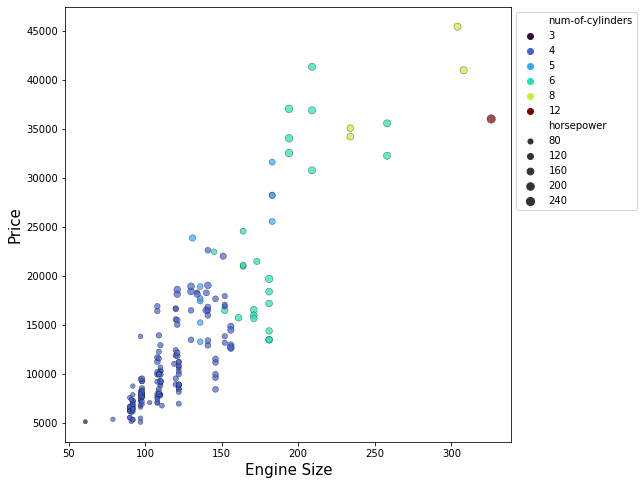

In [31]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=copy_auto_df, x='engine-size', y='price', hue='num-of-cylinders', size = 'horsepower', 
alpha = 0.7, palette = 'turbo', edgecolor = 'black', legend=True)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Engine Size', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

On the plot above, we can see that there is a positive linear correlation between price and engine-size. Not only that, by examining the colour gradation and data point sizes, the increase in engine-size is also correlated with an increase in num-of-cylinders and horsepower. This is expected because cars that are capable of generating large horsepower tends to have larger engines with more cyclinders. These cars tend to be more expensive.

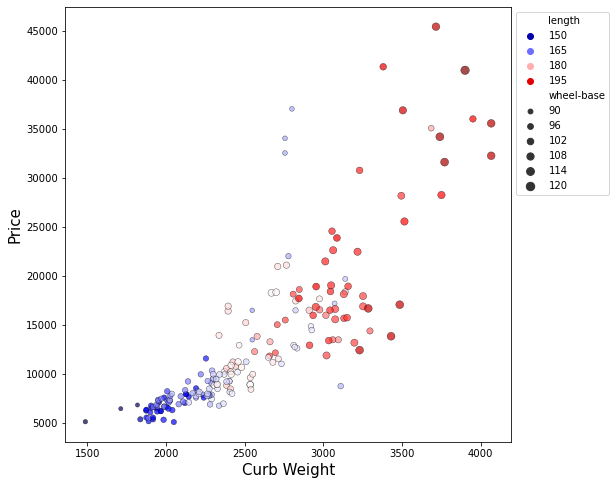

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=copy_auto_df, x='curb-weight', y='price', hue='length', size = 'wheel-base', 
alpha = 0.7, palette = 'seismic', edgecolor = 'black', legend=True)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Curb Weight', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

On the scatter plot above, we can also infer that the prices are usually positively correlated to the physical sizes of the cars (as indicated by their curb-weight, wheel-base, and length). This is expected since, the larger the car, the higher the price usually is.

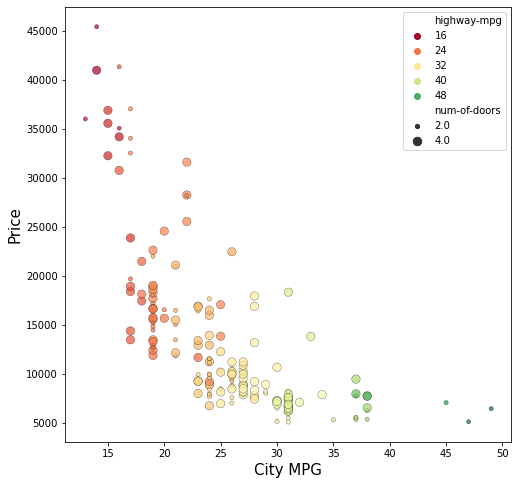

In [33]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=copy_auto_df, x='city-mpg', y='price', hue='highway-mpg', size='num-of-doors', 
alpha = 0.7, palette = 'RdYlGn', edgecolor = 'black', legend=True)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('City MPG', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

On the scatter plot above, we examine city-mpg again as it is visualised differently. From the colour hue, the relationship between city-mpg and highway-mpg is clear. However, city-mpg or price does not correlate well with num-of-doors (as indicated by the sizes of the data points). Highly-priced cars wth low city-mpg have either 2 or 4 doors. In contrast, many of the cheaper cars with high city-mpg only have 2 doors.

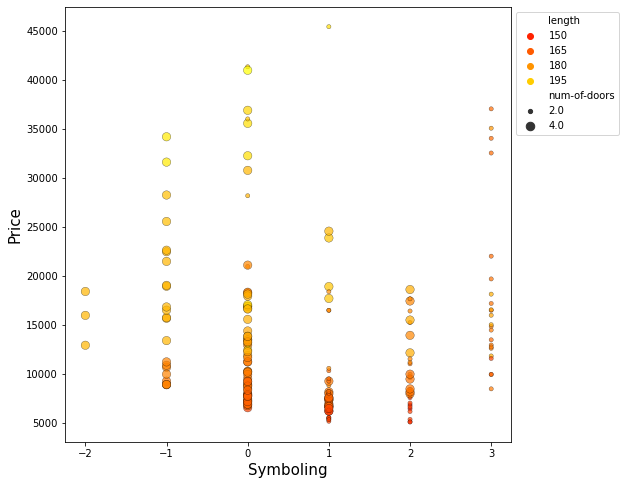

In [34]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=copy_auto_df, x='symboling', y='price', size='num-of-doors', hue='length', 
alpha = 0.7, palette = 'autumn', edgecolor = 'black', legend=True)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Symboling', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

Lastly, we'll examine symboling scores as the insurance-related feature (with -3 being safe and 3 being risky). Firstly, there are no cars with a symboling score of -3. In addition, the symboling score does not correlate well with price (which seems to correlate more to the length (a.k.a size) of the cars). However, it is interesting to note that all cars that were deemed risky (symboling = 3) have only 2 doors, whereas those with a score of -1 or -2 (and therefore were thought of as safe) have mainly 4 doors.

### Section 3 -  Categorical Data Exploration

Now, we will explore the categorical data to gain insights into how these features may influence price.

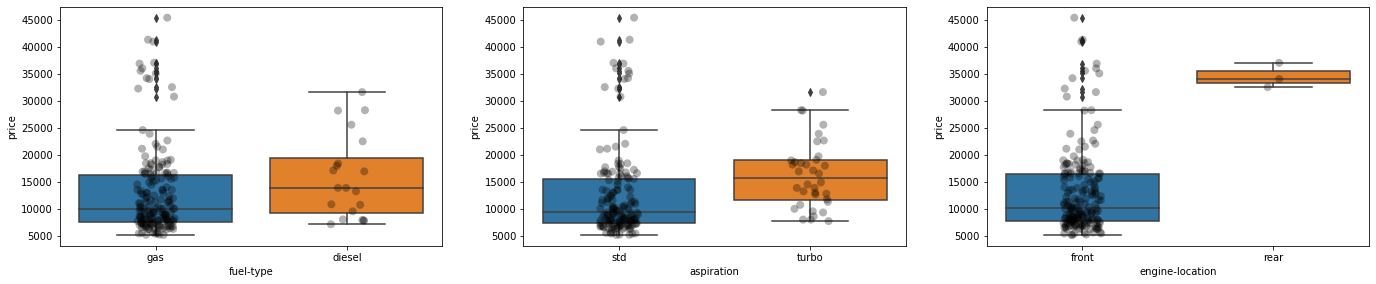

In [53]:
fig, axs = plt.subplots(1, 3, figsize = (20,5))
plt.tight_layout(pad=5.0)

sns.boxplot(data=copy_auto_df, x='fuel-type', y='price', ax=axs[0])
sns.stripplot(data=copy_auto_df, x='fuel-type', y='price', ax=axs[0], color = 'black', alpha = 0.3, size = 8)

sns.boxplot(data=copy_auto_df, x='aspiration', y='price', ax=axs[1])
sns.stripplot(data=copy_auto_df, x='aspiration', y='price', ax=axs[1], color = 'black', alpha = 0.3, size = 8)

sns.boxplot(data=copy_auto_df, x='engine-location', y='price', ax=axs[2])
sns.stripplot(data=copy_auto_df, x='engine-location', y='price', ax=axs[2], color = 'black', alpha = 0.3, size = 8)

plt.show()

- Although on average price does not seem to correlate with fuel-type or aspiration (since the min-max range of the boxplots are similar), there are a number of highly-priced outliers within the gas fuel-type and std aspiration categories.
- Similarly, on average, cars with engines on the rear are priced higher, but there are expensive outliers among cars with front engines. Note that, there are only 3 cars within the rear engine category, so this may not be a representative group.

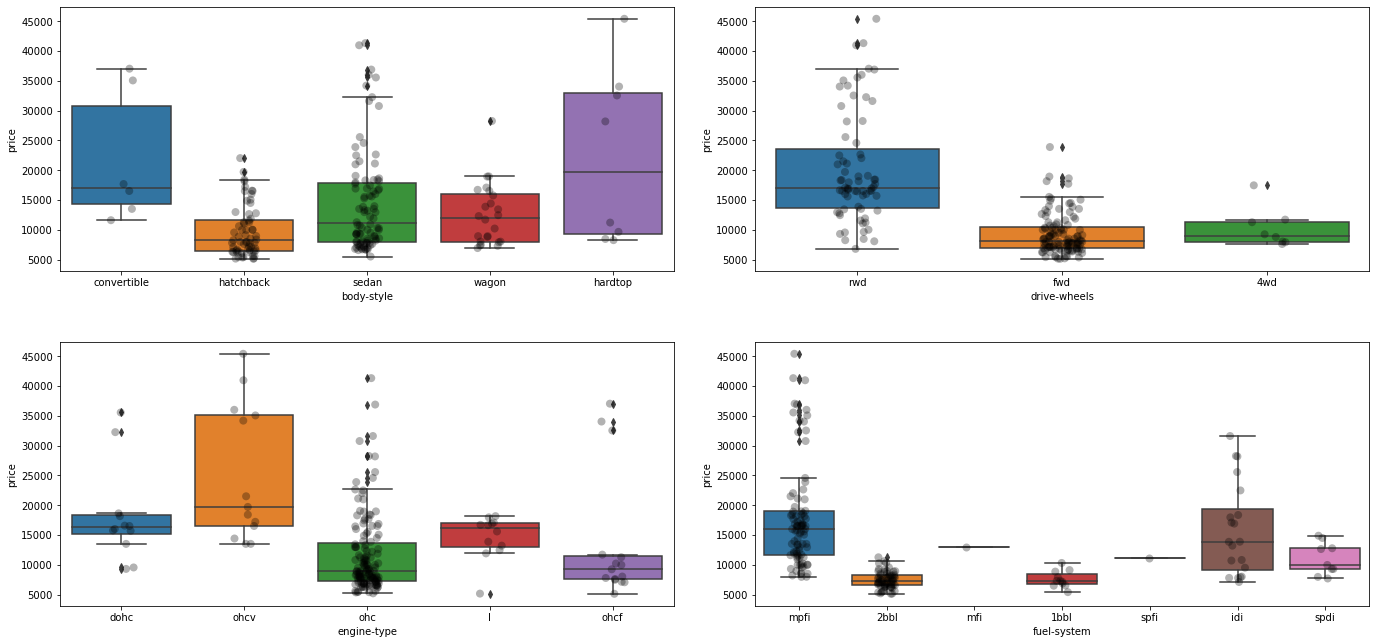

In [54]:
fig, axs = plt.subplots(2, 2, figsize = (20,10))
plt.tight_layout(pad=5.0)

sns.boxplot(data=copy_auto_df, x='body-style', y='price', ax=axs[0,0])
sns.stripplot(data=copy_auto_df, x='body-style', y='price', ax=axs[0,0], color = 'black', alpha = 0.3, size = 8)

sns.boxplot(data=copy_auto_df, x='drive-wheels', y='price', ax=axs[0,1])
sns.stripplot(data=copy_auto_df, x='drive-wheels', y='price', ax=axs[0,1], color = 'black', alpha = 0.3, size = 8)

sns.boxplot(data=copy_auto_df, x='engine-type', y='price', ax=axs[1,0])
sns.stripplot(data=copy_auto_df, x='engine-type', y='price', ax=axs[1,0], color = 'black', alpha = 0.3, size = 8)

sns.boxplot(data=copy_auto_df, x='fuel-system', y='price', ax=axs[1,1])
sns.stripplot(data=copy_auto_df, x='fuel-system', y='price', ax=axs[1,1], color = 'black', alpha = 0.3, size = 8)

plt.show()

- In terms of body-style, convertibles are priced slightly higher compared to hatchback and wagon. Sedan & hardtop show similar min-max ranges, although there are far more cars within the sedan category.
- In terms of fuel-system, rwd cars display a wider range of prices compared to fwd and 4wd cars. The latter two categories show lower median prices compared to rwd.
- There is a wide range of prices within the ohc engine-type category compared to dohc, ohcv, or l, for example. Moreover, ohcv cars are priced slightly higher on average. Lastly, dohc and ohcf categories contain several highly-priced outliers.
- For fuel-system, mpfi is by far the most popular and has the widest range of prices. This is mirrored to a lesser extent by idi fuel-system. Other fuel-system categories seem to have lower prices in general.

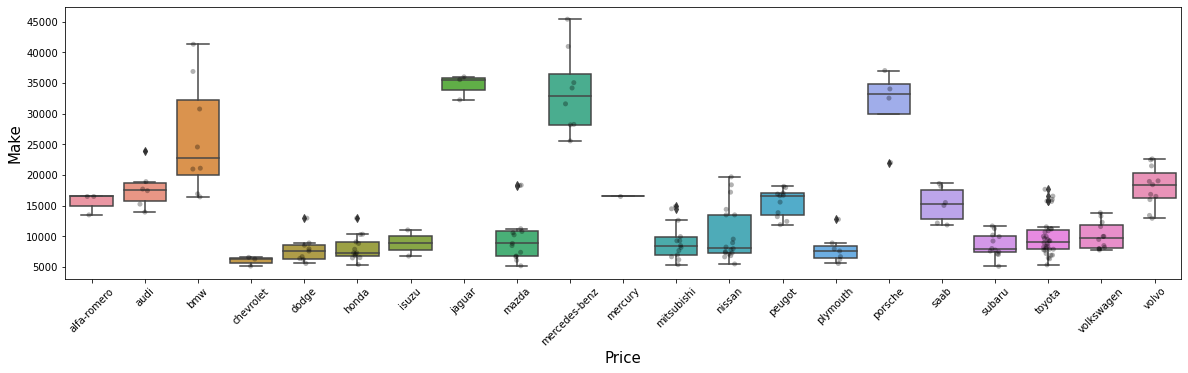

In [55]:
fig = plt.figure(figsize=(20,5))
sns.boxplot(data=copy_auto_df, x='make', y='price')
sns.stripplot(data=copy_auto_df, x='make', y='price', color = 'black', alpha = 0.3, size = 5)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Make', fontsize=15)
plt.xticks(rotation=45)
plt.show()

- In terms of make, cars that are priced on the lower end of the spectrum were mainly manufactured by chevrolet, dodge, honda, isuzu, mazda, mitsubishi, nissan, plymouth, subaru, toyota, and volkswagen.
- In contrast, bmw, jaguar, mercedez-benz, and porsche are known to manufacture expensive premium cars.
To better understand the trend within each make category, the dataset was grouped by 'make' and re-analysed.

In [39]:
make_group = copy_auto_df[['symboling', 'make', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                            'engine-size', 'bore', 'stroke', 'compression-ratio','horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
make_group = round(make_group.groupby(by='make').mean(),2)
make_group.reset_index(inplace=True)
make_group

,make,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,2.33,90.57,169.60,64.57,50.00,2639.67,137.33,3.21,2.94,9.00,125.33,5000.00,20.33,26.67,15498.33
1,audi,1.50,102.73,184.77,68.85,54.83,2758.67,130.67,3.18,3.40,8.63,114.50,5500.00,19.33,24.50,17859.17
2,bmw,0.38,103.16,184.50,66.47,54.82,2929.38,166.88,3.47,3.17,8.57,138.88,5068.75,19.38,25.38,26118.75
3,chevrolet,1.00,92.47,151.93,62.50,52.40,1757.00,80.33,2.99,3.08,9.57,62.67,5300.00,41.00,46.33,6007.00
4,dodge,1.00,95.01,160.99,64.17,51.64,2151.33,102.67,3.09,3.37,8.63,86.33,5388.89,28.00,34.11,7875.44
5,honda,0.62,94.33,160.77,64.38,53.24,2096.77,99.31,3.02,3.46,9.22,80.23,5753.85,30.38,35.46,8184.69
6,isuzu,1.00,95.15,171.65,63.50,52.45,2535.50,115.00,3.37,3.23,8.85,84.00,4900.00,24.00,29.00,8916.50
7,jaguar,0.00,109.33,196.97,69.93,51.13,4027.33,280.67,3.60,3.70,9.23,204.67,4833.33,14.33,18.33,34600.00
8,mazda,0.54,97.55,171.36,65.55,54.52,2262.92,112.38,3.29,3.30,10.82,78.15,4834.62,28.46,34.69,9924.54
9,mercedes-benz,0.00,110.92,195.26,71.06,55.72,3696.25,226.50,3.60,3.43,14.82,146.25,4487.50,18.50,21.00,33647.00


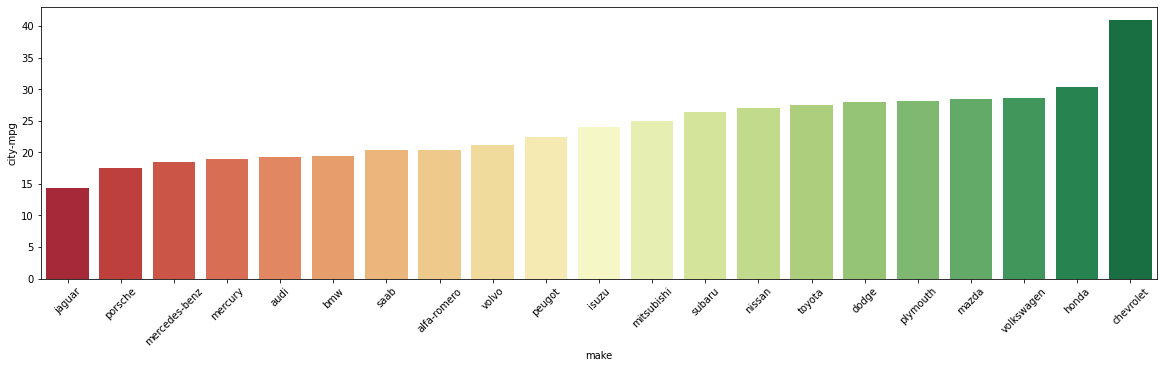

In [40]:
plt.figure(figsize=(20,5))
sns.barplot(data = make_group, x = "make", y = "city-mpg", palette = 'RdYlGn', order=make_group.sort_values('city-mpg').make)
plt.xticks(rotation=45)
plt.show()

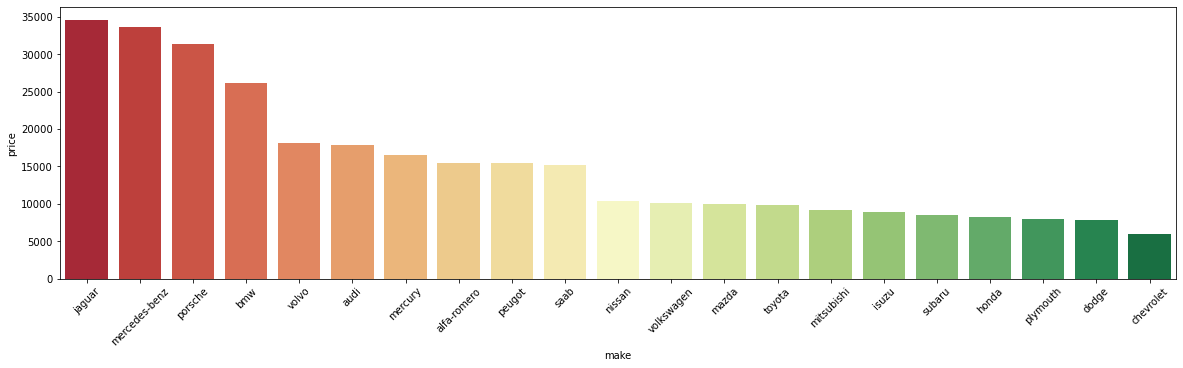

In [41]:
plt.figure(figsize=(20,5))
sns.barplot(data = make_group, x = "make", y = "price", palette = 'RdYlGn', order=make_group.sort_values('price', ascending = False).make)
plt.xticks(rotation=45)
plt.show()

- In terms of fuel efficiency (measured as city-mpg), the more expensive cars (jaguar, porsche & mercedez-benz) are inferior compared to the cheaper cars (such as, chevrolet or honda). This indicates that the more economical cars have been designed to optimise fuel consumption for everyday use, compared to the more expensive cars, which were probably made for speed.
- This can be seen the next bar plots showing that the more expensive cars with low city-mpg tend to be capable at generating high horsepower and tend to be physically longer.

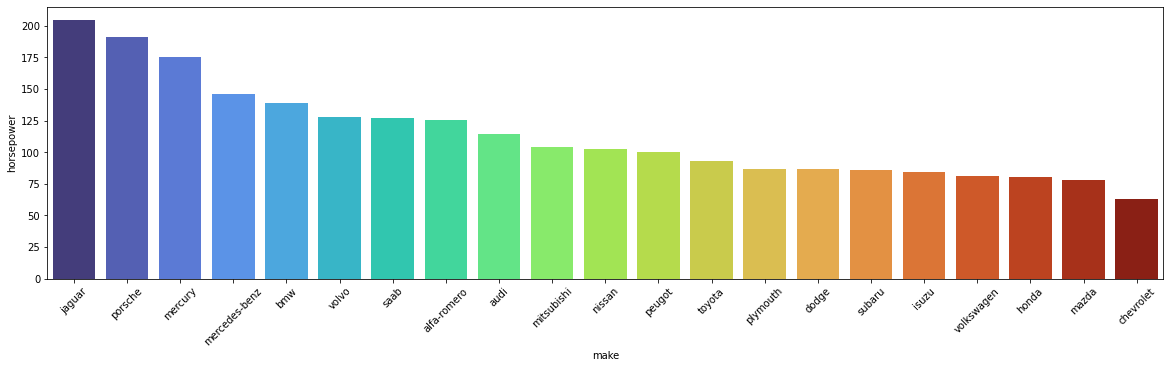

In [42]:
plt.figure(figsize=(20,5))
sns.barplot(data = make_group, x = "make", y = "horsepower", palette = 'turbo', order=make_group.sort_values('horsepower', ascending = False).make)
plt.xticks(rotation=45)
plt.show()

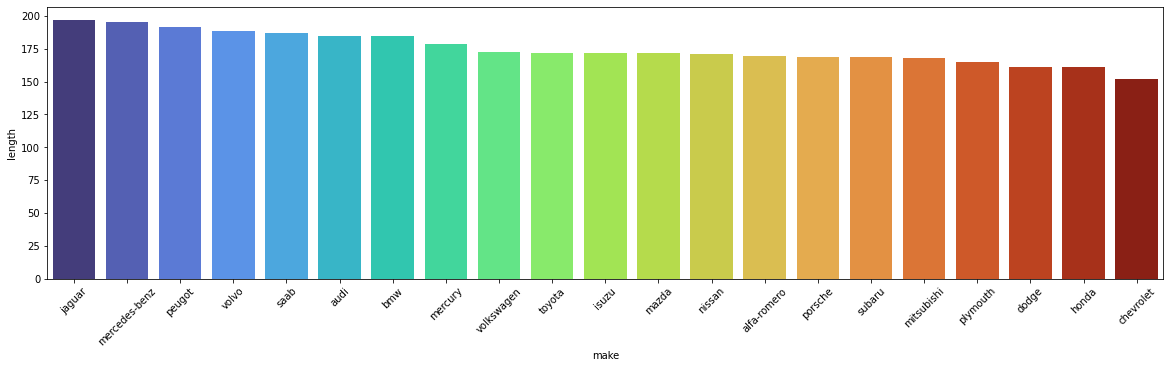

In [43]:
plt.figure(figsize=(20,5))
sns.barplot(data = make_group, x = "make", y = "length", palette = 'turbo', order=make_group.sort_values('length', ascending = False).make)
plt.xticks(rotation=45)
plt.show()

### Supplementary Section - possible correlations between 'normalized-losses' and other data

Here' we'll explore the possibily of 'normalized-loss' having some sort of correlations to other data. First, we'll create a second copy of auto_df dataframe and remove all rows with 0's.

In [44]:
copy2_auto_df = pd.DataFrame(auto_df)

In [45]:
copy2_auto_df.drop(copy2_auto_df[copy2_auto_df['normalized-losses'] == 0].index, inplace=True)
copy2_auto_df.drop(copy2_auto_df[copy2_auto_df['num-of-doors'] == 0].index, inplace=True)
copy2_auto_df.drop(copy2_auto_df[copy2_auto_df['bore'] == 0].index, inplace=True)
copy2_auto_df.drop(copy2_auto_df[copy2_auto_df['stroke'] == 0].index, inplace=True)
copy2_auto_df.drop(copy2_auto_df[copy2_auto_df['horsepower'] == 0].index, inplace=True)
copy2_auto_df.drop(copy2_auto_df[copy2_auto_df['peak-rpm'] == 0].index, inplace=True)
copy2_auto_df.drop(copy2_auto_df[copy2_auto_df['price'] == 0].index, inplace=True)

In [46]:
copy2_auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,4.0,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,4.0,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,2.0,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


By plotting 'normalized-loss' vs 'symboling' we can see a weak correlation (see below) ...

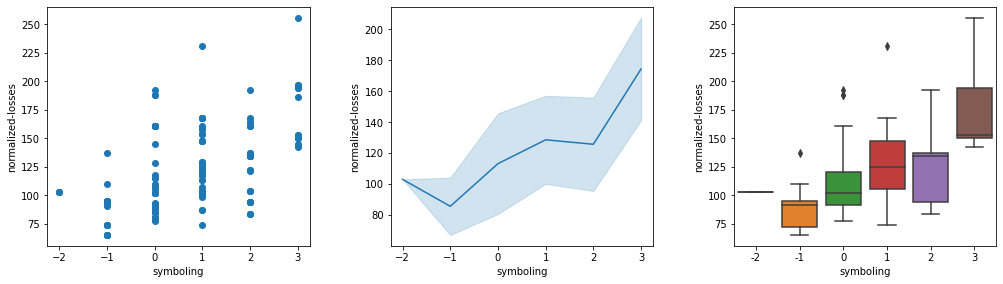

In [47]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout(pad=5.0)

axes[0].scatter(x=copy2_auto_df['symboling'], y=copy2_auto_df['normalized-losses'])
axes[0].set_xlabel("symboling")
axes[0].set_ylabel("normalized-losses")

sns.lineplot(data=copy2_auto_df, x=copy2_auto_df['symboling'], y=copy2_auto_df['normalized-losses'], ci='sd', ax = axes[1])

sns.boxplot(x = copy2_auto_df['symboling'],y = copy2_auto_df['normalized-losses'], ax = axes[2])

plt.show()

In contrast, 'normalized-loss' does not seem to correlate with 'price' (see below) ...

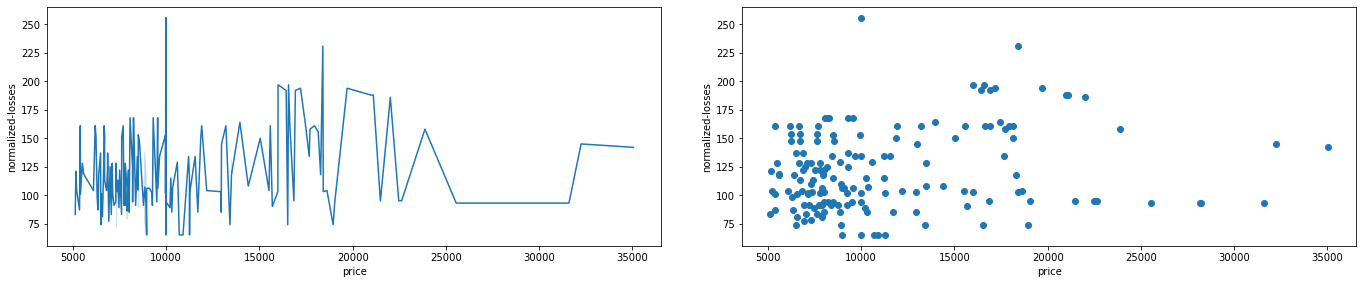

In [48]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
fig.tight_layout(pad=5.0)

sns.lineplot(data=copy2_auto_df, x=copy2_auto_df['price'], y=copy2_auto_df['normalized-losses'], ci='sd', ax = axes[0])

axes[1].scatter(x=copy2_auto_df['price'], y=copy2_auto_df['normalized-losses'])
axes[1].set_xlabel("price")
axes[1].set_ylabel("normalized-losses")

plt.show()

We can perform a simple linear regression to quantify the degree of correlation between 'normalized-loss' vs 'symboling' (see below) ...

In [49]:
y = copy2_auto_df['normalized-losses']
x1 = copy2_auto_df['symboling']

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      normalized-losses   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     58.06
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           2.20e-12
Time:                        19:27:06   Log-Likelihood:                -773.08
No. Observations:                 160   AIC:                             1550.
Df Residuals:                     158   BIC:                             1556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.8573      2.843     38.636      0.000     104.241     115.473
symboling     15.5155      2.036      7.620      0.000      11.494      19.537
==============================================================================
Omnibus:                       19.802   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.382
Skew:                           0.830   Prob(JB):                     8.37e-06
Kurtosis:                       3.869   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

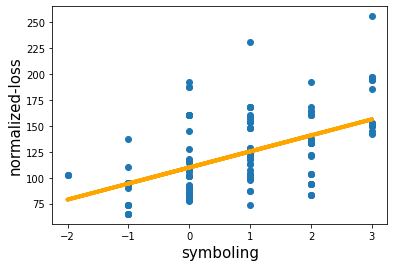

In [50]:
plt.scatter(x1,y)
yhat = 109.8573 + 15.5155*x1
plt.xlabel('symboling', fontsize = 15)
plt.ylabel('normalized-loss', fontsize = 15)
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'linear regression')
plt.show()

From the OLS (Ordinary Least Square) Regression Results table, we can see that the correlation is weak (R-squared and Adj. R-squared of ~0.26). However, the F-statistics is large (~58) and that Prob (F-statistics) is very small (2.20e-12). In addition, the P-values for the coefficient for 'symboling' and the intercept (const) are effectively 0. Overall, the results indicate that the model is significant. Therefore, the 'normalized-losses' column was dropped earlier, while keeping 'symboling' only as the only insurance-related representative feature. 